# EDA and Pre-Processing

In [34]:
from numpy import array
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [35]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [36]:
df = pd.read_csv('data.csv', index_col = 0)
df.drop('id', axis=1, inplace=True)

In [37]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [38]:
df.shape

(103904, 23)

In [39]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

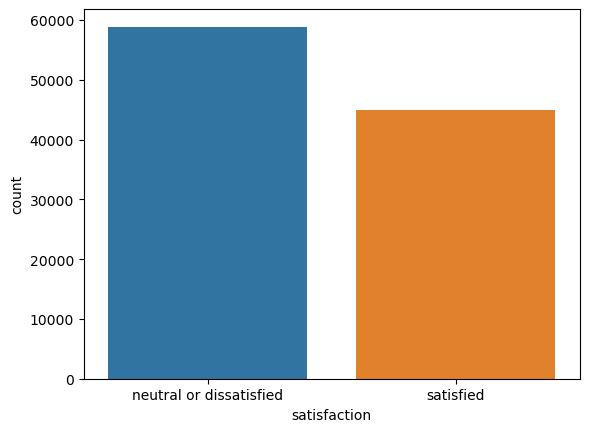

In [40]:
sns.countplot(x='satisfaction', data=df, fill=True)

In [8]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [9]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

## Continuous Feature

In [41]:
cont_feat = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

<AxesSubplot:>

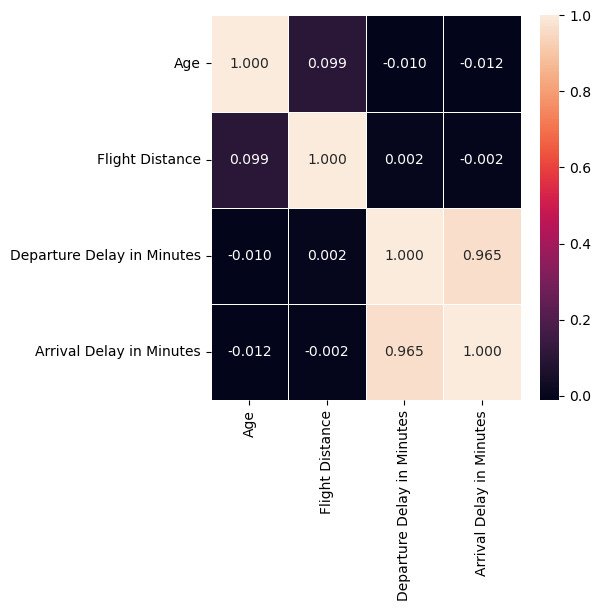

In [19]:
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(df[cont_feat].corr(), annot = True, linewidth = .5, fmt = '.3f', ax = ax)

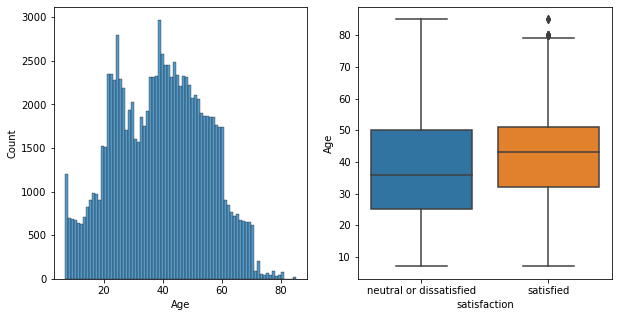

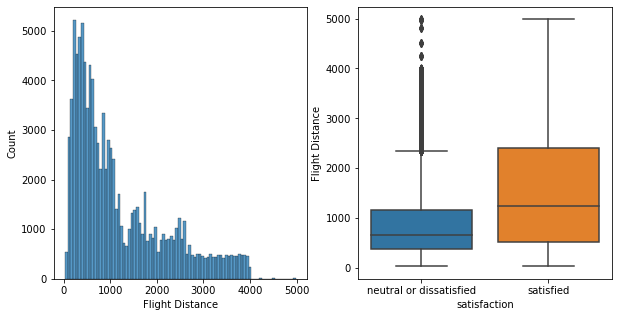

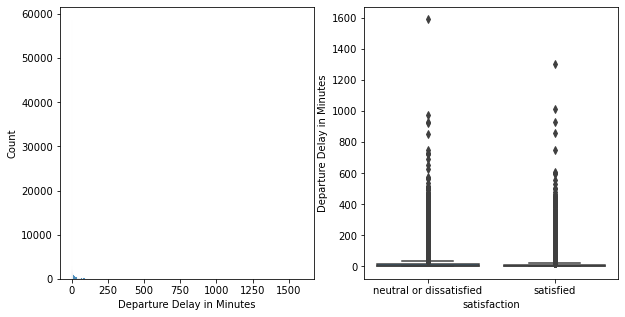

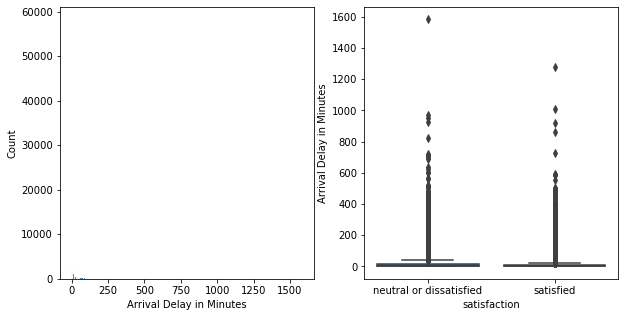

In [9]:
for col in cont_feat:
    f, ax = plt.subplots(1, 2, figsize = (10, 5))
    sns.histplot(data = df, x = col, ax=ax[0])
    sns.boxplot(x='satisfaction',y=col, data=df, ax=ax[1])
    plt.show()

In [10]:
def detect_outliers(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\n Outliers caps for {}: '.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                          len([i for i in data if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3 * std, len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99), 
                                                          len([i for i in data if i > data.quantile(.99)])))

In [65]:
for feat in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    detect_outliers(feat)


 Outliers caps for Departure Delay in Minutes: 
  --95p: 78.0 / 5132 values exceed that
  --3sd: 129.5 / 2222 values exceed that
  --99p: 182.0 / 1040 values exceed that

 Outliers caps for Arrival Delay in Minutes: 
  --95p: 79.0 / 5142 values exceed that
  --3sd: 131.1 / 2225 values exceed that
  --99p: 183.0 / 1039 values exceed that


In [21]:
df[cont_feat].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


### Encode Categorical Features

In [42]:
cat_feat = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [43]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding
encoder_df = pd.DataFrame(encoder.fit_transform(df[cat_feat]).toarray())

#merge one-hot encoded columns back with original DataFrame
df1 = df.join(encoder_df)

In [44]:
final_df = df1.drop(cat_feat, axis=1)

In [45]:
final_df.shape

(103904, 28)

In [46]:
final_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,0,1,2,3,4,5,6,7,8
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### Train and Test Split

In [47]:
final_df1 = final_df[-10000:].copy()

In [48]:
y = final_df1['satisfaction'].copy()
X = final_df1.drop(['satisfaction'], axis=1)

In [49]:
#split dataset in training, validation and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 27), (7000,), (3000, 27), (3000,))

### Remove Outliers

In [51]:
for feat in cont_feat:
    X_train[feat].clip(upper = X_train[feat].quantile(.99), inplace = True)
    X_test[feat].clip(upper = X_train[feat].quantile(.99), inplace = True)

### Fill Missing Values

In [52]:
mean = X_train[X_train['Arrival Delay in Minutes'].isnull()]['Departure Delay in Minutes'].mean()

In [53]:
X_train['Arrival Delay in Minutes'].fillna(mean, inplace = True)
X_test['Arrival Delay in Minutes'].fillna(mean, inplace = True)

In [54]:
X_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2,3,4,5,6,7,8
102973,21,319.0,5,3,5,3,2,5,5,2,1,1,3,1,3,2,28,20.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
96507,69,609.0,3,4,4,4,1,4,4,3,3,3,3,3,3,3,10,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
101642,23,657.0,5,5,5,3,3,5,3,3,4,3,4,3,4,3,40,32.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
95483,24,338.0,3,4,3,3,2,3,2,2,5,5,5,5,5,2,39,26.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
98962,27,1195.0,5,5,5,5,5,5,5,5,4,4,3,5,5,5,55,48.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Min Max Normalization

In [55]:
range_ = X_train.min() - X_train.max()
min_ = X_train.min()

In [56]:
X_train = (X_train-min_)/ range_

In [57]:
X_test = (X_test-min_)/(range_)

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 27), (7000,), (3000, 27), (3000,))

In [59]:
X_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2,3,4,5,6,7,8
100156,-0.365079,-0.009150,-0.4,-0.8,-0.4,-0.50,-0.8,-0.4,-0.75,-0.75,-0.50,-0.2,-1.00,-1.00,-0.25,-0.75,-0.000000,-0.000000,-0.0,-1.0,-1.0,-0.0,-0.0,-1.0,-0.0,-1.0,-0.0
98588,-0.952381,-0.210196,-1.0,-0.4,-0.4,-0.25,-1.0,-1.0,-1.00,-1.00,-1.00,-0.8,-0.25,-0.75,-0.75,-1.00,-0.175532,-0.137428,-0.0,-1.0,-1.0,-0.0,-1.0,-0.0,-0.0,-1.0,-0.0
95635,-0.682540,-0.816730,-0.8,-0.6,-0.8,-0.75,-0.6,-0.8,-1.00,-0.25,-0.25,-0.4,-0.25,-0.50,-0.25,-0.50,-0.000000,-0.000000,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0
98646,-0.571429,-0.390849,-1.0,-1.0,-0.8,-1.00,-0.4,-1.0,-0.75,-0.75,-0.75,-1.0,-0.75,-0.75,-0.75,-1.00,-0.000000,-0.000000,-0.0,-1.0,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0
98425,-0.825397,-0.053333,-0.2,-0.8,-0.8,-0.75,-0.4,-0.6,-0.50,-0.00,-0.00,-0.2,-0.00,-0.75,-0.00,-0.25,-0.000000,-0.000000,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-1.0,-0.0


In [60]:
train = X_train.join(y_train)
test = X_test.join(y_test)

In [61]:
train.shape

(7000, 28)

In [62]:
train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,0,1,2,3,4,5,6,7,8,satisfaction
102973,-0.222222,-0.065882,-1.0,-0.6,-1.0,-0.50,-0.4,-1.0,-1.00,-0.25,-0.00,-0.2,-0.50,-0.0,-0.50,-0.25,-0.148936,-0.105714,-1.0,-0.0,-1.0,-0.0,-0.0,-1.0,-0.0,-1.0,-0.0,satisfied
96507,-0.984127,-0.141699,-0.6,-0.8,-0.8,-0.75,-0.2,-0.8,-0.75,-0.50,-0.50,-0.6,-0.50,-0.5,-0.50,-0.50,-0.053191,-0.015857,-0.0,-1.0,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,neutral or dissatisfied
101642,-0.253968,-0.154248,-1.0,-1.0,-1.0,-0.50,-0.6,-1.0,-0.50,-0.50,-0.75,-0.6,-0.75,-0.5,-0.75,-0.50,-0.212766,-0.169142,-1.0,-0.0,-0.0,-1.0,-1.0,-0.0,-0.0,-1.0,-0.0,satisfied
95483,-0.269841,-0.070849,-0.6,-0.8,-0.6,-0.50,-0.4,-0.6,-0.25,-0.25,-1.00,-1.0,-1.00,-1.0,-1.00,-0.25,-0.207447,-0.137428,-0.0,-1.0,-0.0,-1.0,-1.0,-0.0,-0.0,-1.0,-0.0,neutral or dissatisfied
98962,-0.317460,-0.294901,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.00,-1.00,-0.75,-0.8,-0.50,-1.0,-1.00,-1.00,-0.292553,-0.253713,-1.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-1.0,-0.0,satisfied


In [63]:
test.shape

(3000, 28)

In [35]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [36]:
train.to_csv('train.csv', header=False)
test.to_csv('test.csv', header=False)

# Predictions

In [23]:
import pandas as pd

In [96]:
test = pd.read_csv('test.csv', header=None)
y_test = test[28].copy()

In [97]:
predictions = pd.read_json('predictions.json').T

In [98]:
predictions = predictions.sort_index(ascending=True)

In [99]:
predictions.head()

,0,1,2,3,4,5,6,7,8,9
0,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied
1,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
2,neutral or dissatisfied,satisfied,neutral or dissatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
3,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
4,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied


In [100]:
predictions.shape

(3000, 10)

In [101]:
results = {}

In [107]:
for i in range(0, predictions.shape[1]):
    acc = sum(predictions.iloc[:,i] == list(y_test))/len(y_test)
    results['K' + str(i + 1)] = acc
print(results)

{'K1': 0.8283333333333334, 'K2': 0.8076666666666666, 'K3': 0.8423333333333334, 'K4': 0.8396666666666667, 'K5': 0.8493333333333334, 'K6': 0.845, 'K7': 0.848, 'K8': 0.8426666666666667, 'K9': 0.8476666666666667, 'K10': 0.844}


In [109]:
results.values()

dict_values([0.8283333333333334, 0.8076666666666666, 0.8423333333333334, 0.8396666666666667, 0.8493333333333334, 0.845, 0.848, 0.8426666666666667, 0.8476666666666667, 0.844])

Maximum accuracy:- 0.9256051200615947 at K = 5


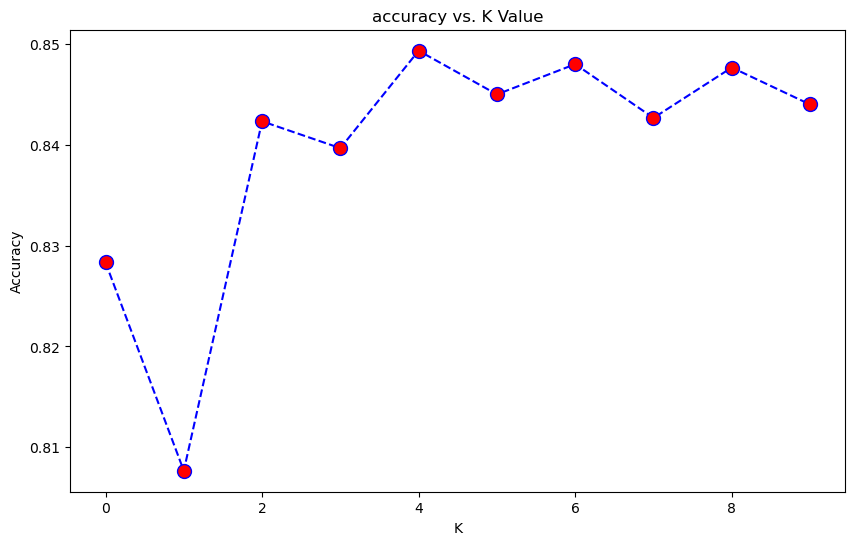

In [112]:
acc = [0.913382416630576, 0.9095327462586016, 0.9233915595977095,
            0.9165102738078053, 0.9256051200615947, 0.9222366584861171,
            0.9253645156633463, 0.9209855156152255, 0.9244502189500025,
            0.920744911216977, 0.9235359222366585, 0.9202637024204803,
            0.9228141090419133, 0.9205043068187286]

plt.figure(figsize=(10,6))
plt.plot(range(0,10),results.values(),color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)) + 1)